# Router
- llm deciding whether to respond directly or make a tool call - Simplest Agent
- Extending to more nodes

In [47]:
import os
from dotenv import load_dotenv
load_dotenv()

# Setup the llm with tools
from langchain_openai import ChatOpenAI

def multiply(a: int, b: int) -> int:
    """Multiply a and b.

    Args:
        a: first int
        b: second int
    """
    return a * b

llm = ChatOpenAI(model="gpt-4o")
llm_with_tools = llm.bind_tools([multiply])

 We use the built-in `ToolNode` and simply pass a list of our tools to initialize it. 
 
 We use the built-in `tools_condition` as our conditional edge

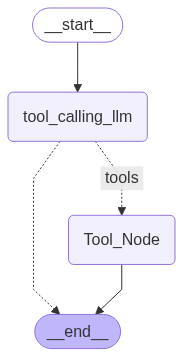

In [41]:
from IPython.display import display, Image
from langgraph.graph.message import MessagesState
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode, tools_condition

# Node 
def tool_calling_llm(state: MessagesState):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

# Build Graph
builder = StateGraph(MessagesState)

# Add Nodes
builder.add_node('tool_calling_llm', tool_calling_llm)
builder.add_node('Tool_Node', ToolNode([multiply]))

# Add Edges
builder.add_edge(START, 'tool_calling_llm')
builder.add_conditional_edges('tool_calling_llm',tools_condition, path_map={'tools':'Tool_Node',
                                                                            END:END})

# Compile
graph = builder.compile()

# Display
display(Image(graph.get_graph().draw_mermaid_png()))

In [42]:
from langchain_core.messages import HumanMessage
messages = [HumanMessage(content="Hello, what is 2 multiplied by 2?")]
messages = graph.invoke({"messages": messages})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Hello, what is 2 multiplied by 2?
================================== Ai Message ==================================
Tool Calls:
  multiply (call_ASO6kpr5TejKfzBFYmXn8y3Z)
 Call ID: call_ASO6kpr5TejKfzBFYmXn8y3Z
  Args:
    a: 2
    b: 2
================================= Tool Message =================================
Name: multiply

4
